### Sentiment Analysis

In Natural Language Processing there is a concept known as Sentiment Analysis.

Given a movie review or a tweet, it can be automatically classified in categories.

These categories can be user defined (positive, negative) or whichever classes you want.


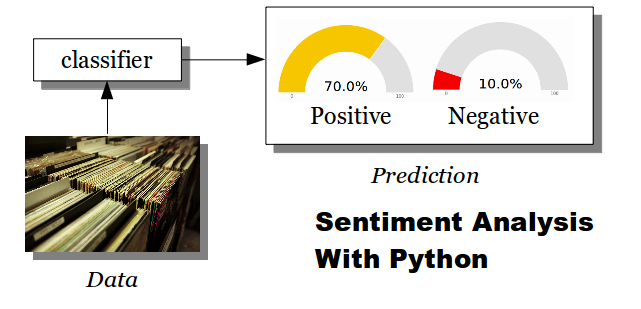

## Sentiment Analysis Example

Classification is done using several steps: training and prediction.

The training phase needs to have training data, this is example data in which we define examples. 

The classifier will use the training data to make predictions.



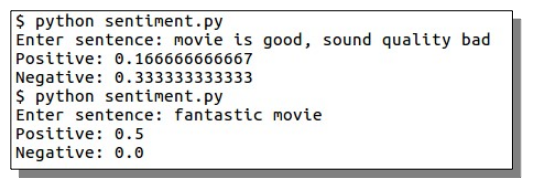

sentiment analysis, example runs

We start by defining 3 classes: positive, negative and neutral.

Each of these is defined by a vocabulary:

In [1]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

Every word is converted into a feature using a simplified bag of words model:

def word_feats(words):
    return dict([(word, True) for word in words])

This is what the func gives for positive_vocab
{'awesome': True,
 'outstanding': True,
 'fantastic': True,
 'terrific': True,
 'good': True,
 'nice': True,
 'great': True,
 ':)': True}

 but when for loop assigning positive_features it gives this (due to double loop)

 [({'a': True, 'w': True, 'e': True, 's': True, 'o': True, 'm': True}, 'pos'),
 ({'o': True,
   'u': True,
   't': True,
   's': True,
   'a': True,
   'n': True,
   'd': True,
   'i': True,
   'g': True},
  'pos'),
 ({'f': True,
   'a': True,
   'n': True,
   't': True,
   's': True,
   'i': True,
   'c': True},
  'pos'),
 ({'t': True, 'e': True, 'r': True, 'i': True, 'f': True, 'c': True}, 'pos'),
 ({'g': True, 'o': True, 'd': True}, 'pos'),
 ({'n': True, 'i': True, 'c': True, 'e': True}, 'pos'),
 ({'g': True, 'r': True, 'e': True, 'a': True, 't': True}, 'pos'),
 ({':': True, ')': True}, 'pos')]

In [2]:
def word_feats(word):
    return dict([(word, True)])

# Explained later in naivebayesclassifier section for training

In [3]:
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

Our training set is then the sum of these three feature sets:

In [4]:
train_set = negative_features + positive_features + neutral_features

We train the classifier:

In [5]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# 

AttributeError                            Traceback (most recent call last)
 in 
      1 from nltk.classify import NaiveBayesClassifier
      2 
----> 3 classifier = NaiveBayesClassifier.train(train_set)

C:\Python37\lib\site-packages\nltk\classify\naivebayes.py in train(cls, labeled_featuresets, estimator)
    206         for featureset, label in labeled_featuresets:
    207             label_freqdist[label] += 1
--> 208             for fname, fval in featureset.items():
    209                 # Increment freq(fval|label, fname)
    210                 feature_freqdist[label, fname][fval] += 1

AttributeError: 'str' object has no attribute 'items'

### Due to this AttributeError we make a func wordfeats to be compatible to naivebayes.py

And make predictions.

Code example
This example classifies sentences according to the training set.

In [6]:
# import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
# from nltk.corpus import names

# def word_feats(words):
    # return dict([(word, True) for word in words])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

train_set = negative_features + positive_features + neutral_features

classifier = NaiveBayesClassifier.train(train_set) 

# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word) )
    if classResult == 'neg':
        neg = neg + 1
    elif classResult == 'pos':
        pos = pos + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.2
Negative: 0.0


To enter the input sentence manually, use the input or raw_input functions.

The better your training data is, the more accurate your predictions. 

In this example our training data is very small.

A good dataset will increase the accuracy of your classifier.

##### ref:https://pythonspot.com/category/nltk/